## Data Visualization
#### Generate graphs and visulizations, pie diagrams, histogram, boxplots, plots and scatter plots, genearate as many as you can using for loops, at least 5 diferent diagrams.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("dataset_limpio.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


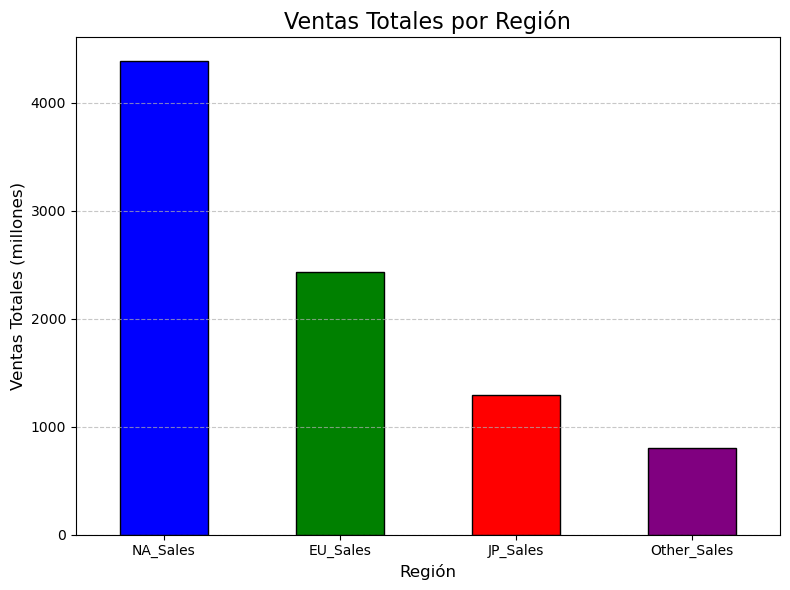

In [4]:
ventas = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 6))
ventas.plot(kind='bar', color=['blue', 'green', 'red', 'purple'], edgecolor='black')
plt.title('Ventas Totales por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

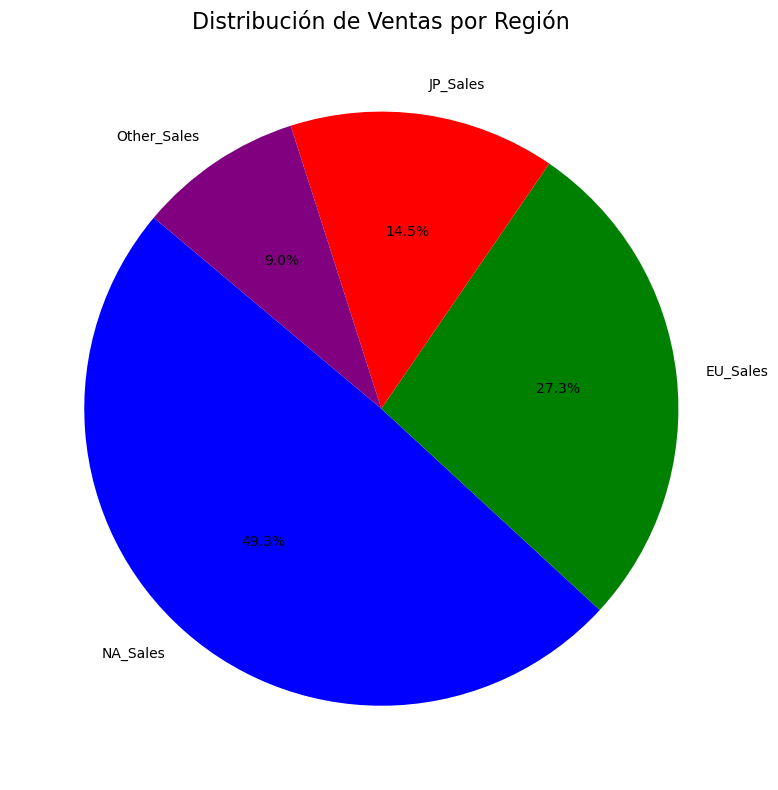

In [5]:
plt.figure(figsize=(8, 8))
ventas.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'purple'])
plt.title('Distribución de Ventas por Región', fontsize=16)
plt.ylabel('')  # Ocultar etiqueta del eje Y
plt.tight_layout()
plt.show()

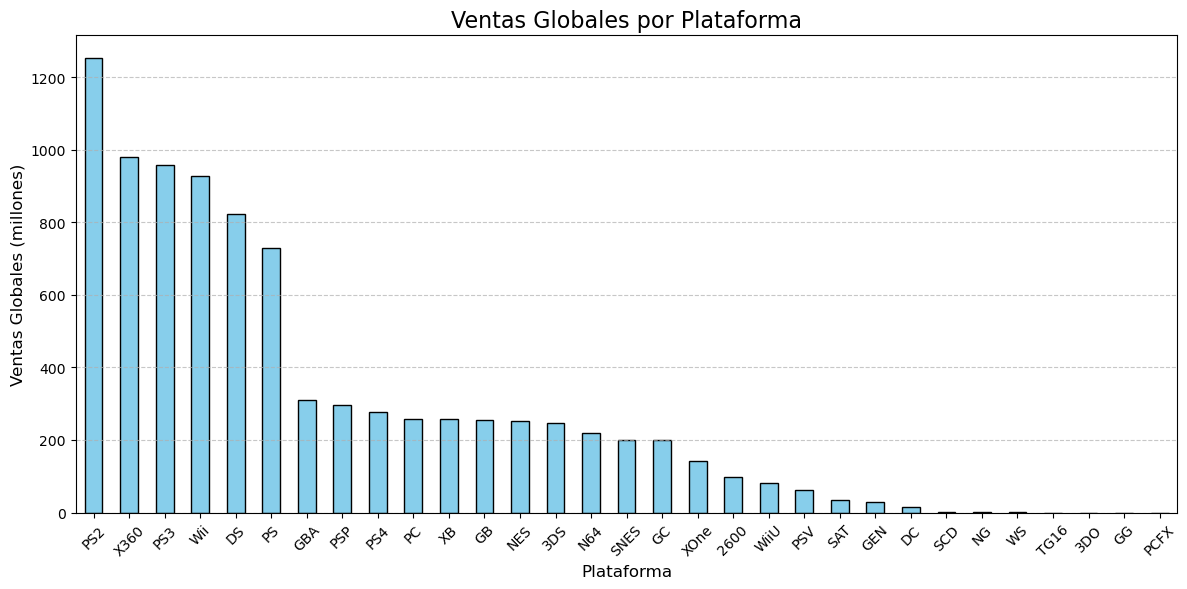

In [6]:
plataformas = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plataformas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ventas Globales por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

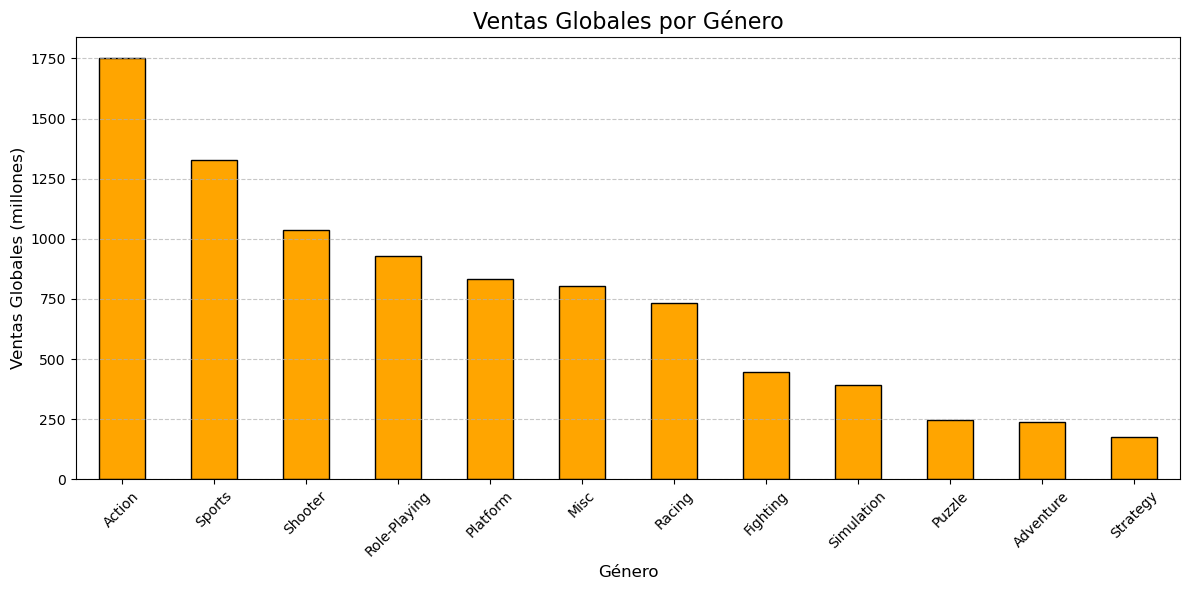

In [7]:
generos = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
generos.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Ventas Globales por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

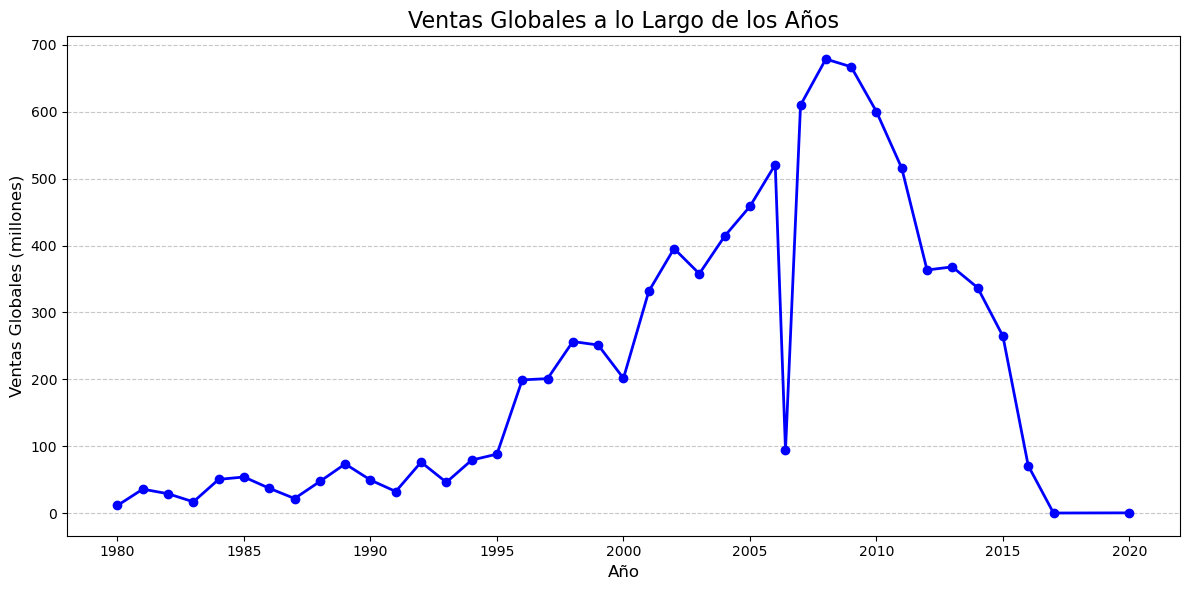

In [8]:
ventas_por_año = df.groupby('Year')['Global_Sales'].sum().sort_index()

plt.figure(figsize=(12, 6))
ventas_por_año.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Ventas Globales a lo Largo de los Años', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


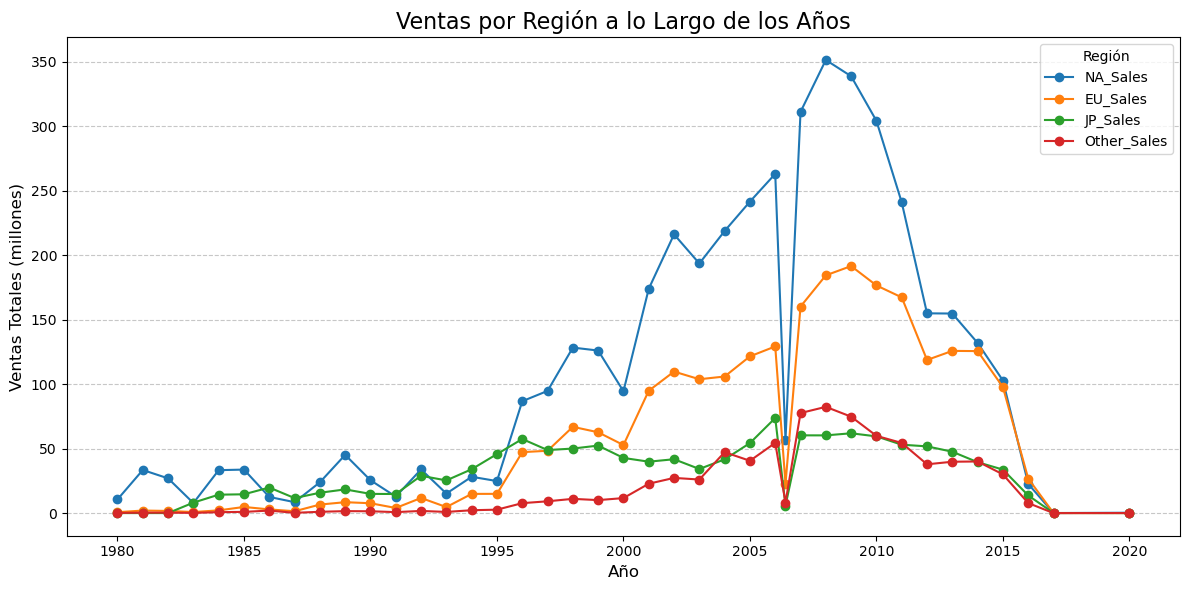

In [9]:
ventas_por_año_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(12, 6))
for region in ventas_por_año_region.columns:
    plt.plot(ventas_por_año_region.index, ventas_por_año_region[region], marker='o', label=region)

plt.title('Ventas por Región a lo Largo de los Años', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.legend(title="Región")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

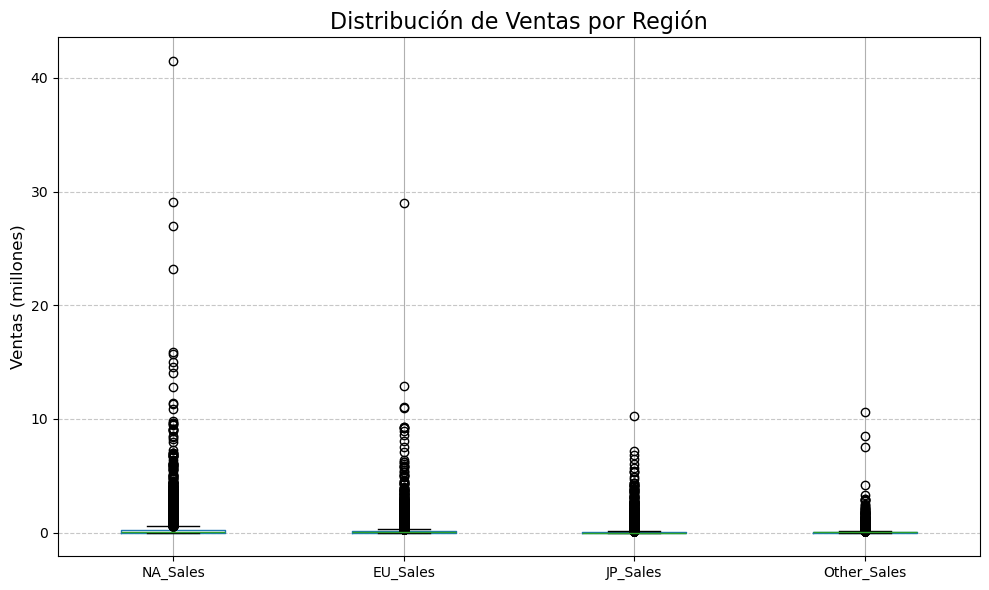

In [10]:
plt.figure(figsize=(10, 6))
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].boxplot()
plt.title('Distribución de Ventas por Región', fontsize=16)
plt.ylabel('Ventas (millones)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

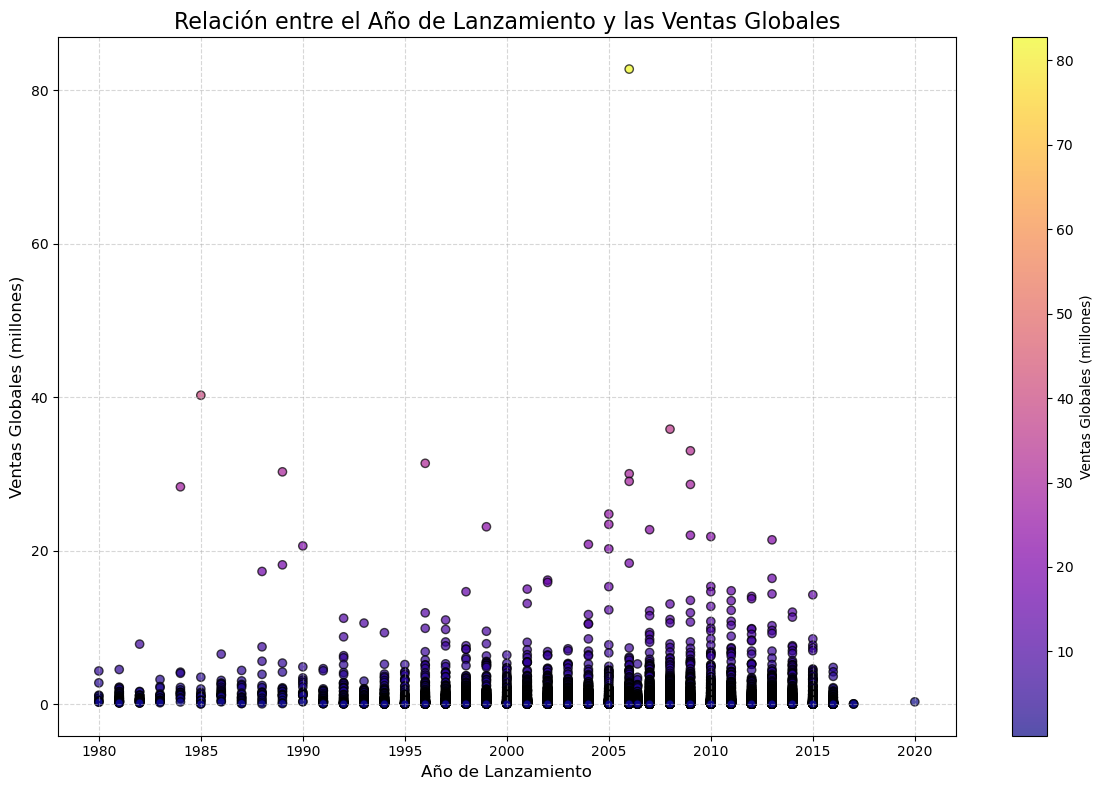

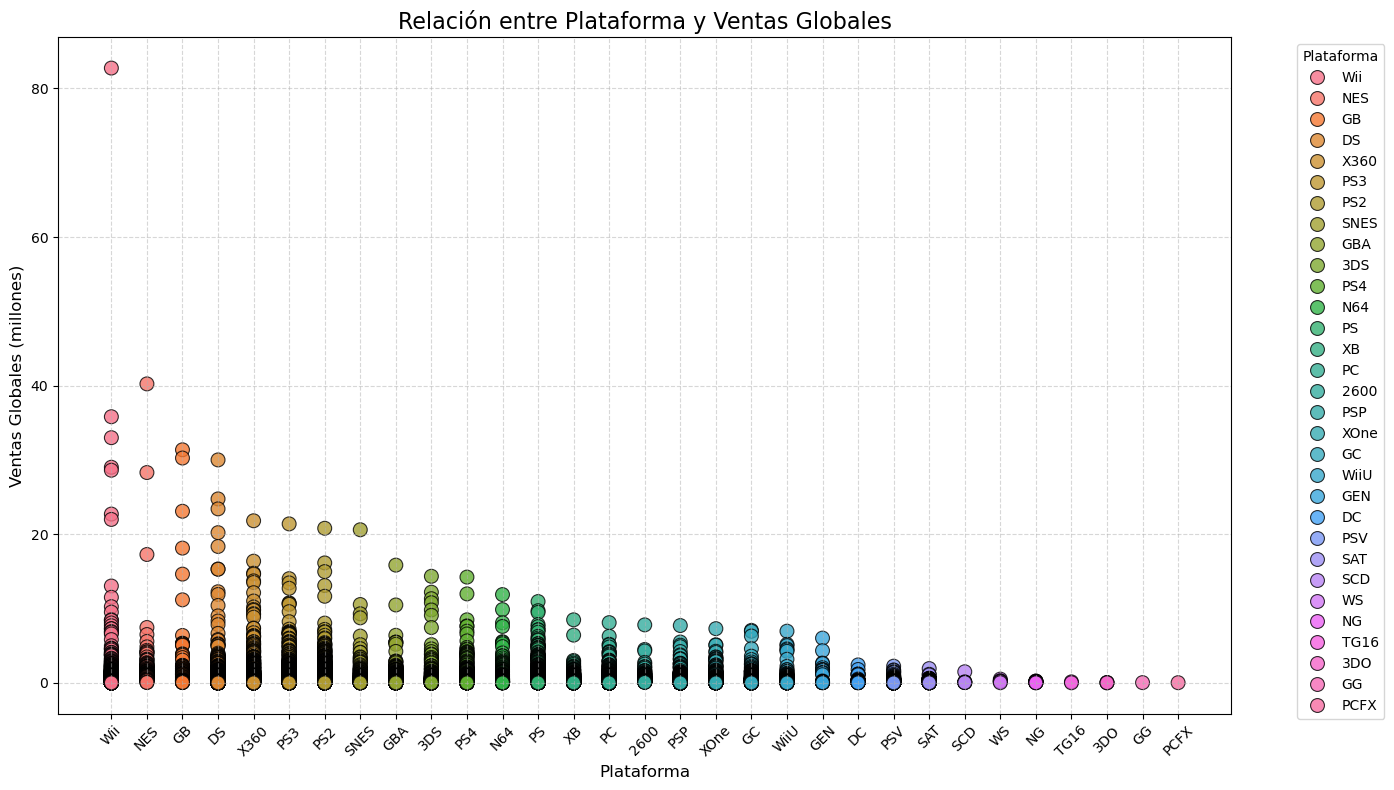

In [11]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Year'], df['Global_Sales'],
    c=df['Global_Sales'], cmap='plasma', alpha=0.7, edgecolor='black'
)
plt.colorbar(scatter, label='Ventas Globales (millones)')
plt.title('Relación entre el Año de Lanzamiento y las Ventas Globales', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
platform_colors = sns.color_palette('husl', len(df['Platform'].unique()))
sns.scatterplot(
    data=df, x='Platform', y='Global_Sales', hue='Platform',
    palette=platform_colors, alpha=0.8, edgecolor='black', s=100
)
plt.title('Relación entre Plataforma y Ventas Globales', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


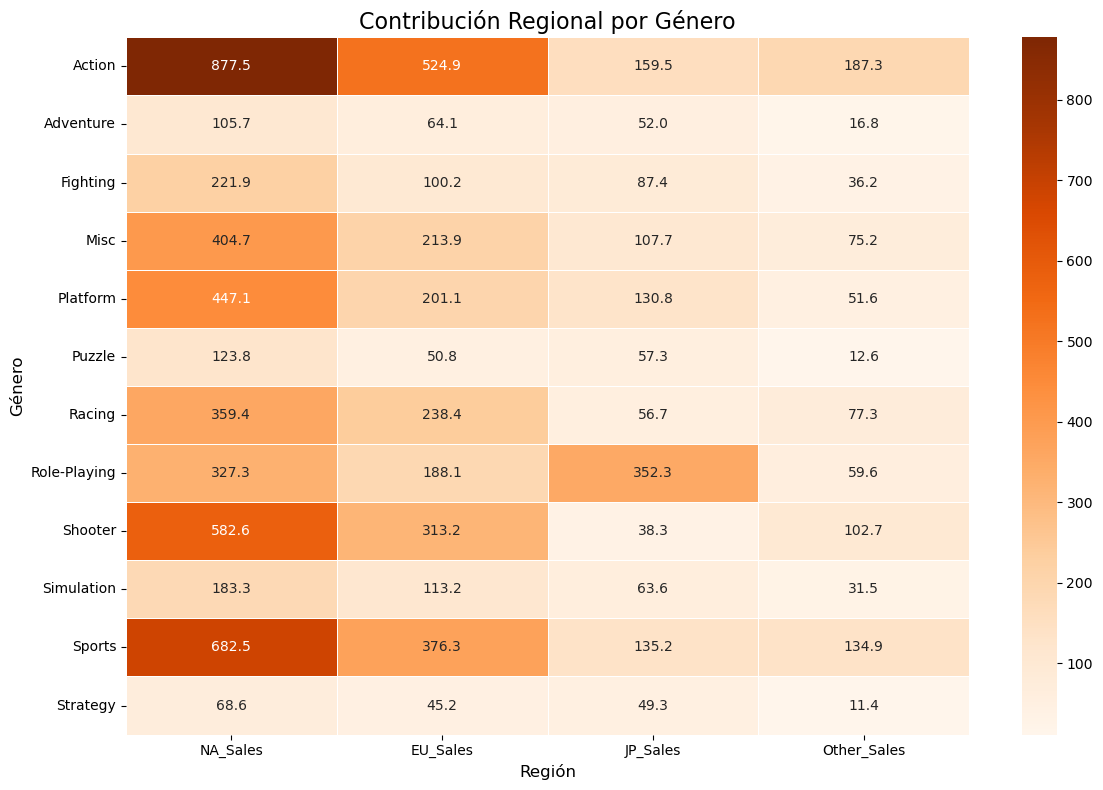

In [12]:
ventas_regional_genero = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(12, 8))
sns.heatmap(ventas_regional_genero, annot=True, fmt=".1f", cmap='Oranges', linewidths=0.5)
plt.title('Contribución Regional por Género', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()
plt.show()
